# Импортируем нужные библеотеки для анализа

In [4]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as m
%matplotlib inline


# Подготовка данных:
- Проверяем с помощью df.info и df.head качество данных - есть ли пропуски и какие типы у столбцов
- Переводим имена колонок и столбцов на русский
- Изменяем тип колонки пол из объекта в категориальную

In [10]:
df = pd.read_csv('..//DataSet/Mall_Customers.csv',header=0,names = ['ID-покупателя','Пол','Возраст','Годовой доход($)','Оценка расходов(1-100)'],index_col='ID-покупателя')
df['Пол']=df['Пол'].apply(lambda x: 'М' if x == 'Male' else 'Ж')
df['Пол'] = pd.Categorical(df['Пол'],ordered=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Пол                     200 non-null    category
 1   Возраст                 200 non-null    int64   
 2   Годовой доход($)        200 non-null    int64   
 3   Оценка расходов(1-100)  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 6.6 KB


,Пол,Возраст,Годовой доход($),Оценка расходов(1-100)
ID-покупателя,,,,
1,М,19,15,39
2,М,21,15,81
3,Ж,20,16,6
4,Ж,23,16,77
5,Ж,31,17,40


# Рассмотрим графичиски зависимость возраста/пола и их совместную выборку и годовго дохода
## Визуальная понятность графика - слабая
проблема - цветовые решения не гибко настраиваются

C:\Users\user\AppData\Local\Temp\ipykernel_8212\1824303343.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Годовой доход($)'])


<AxesSubplot: xlabel='Пол,Возраст'>

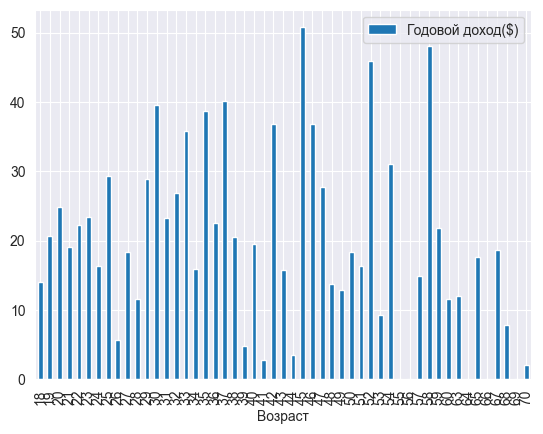

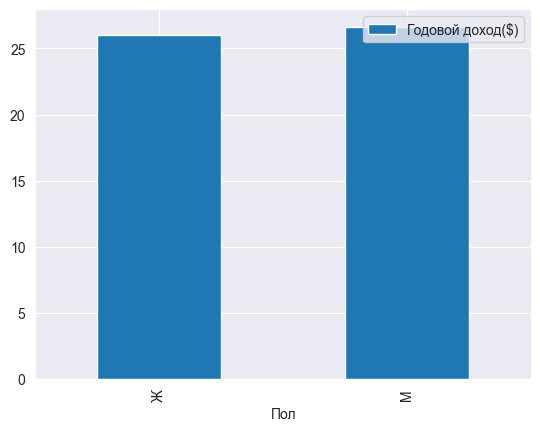

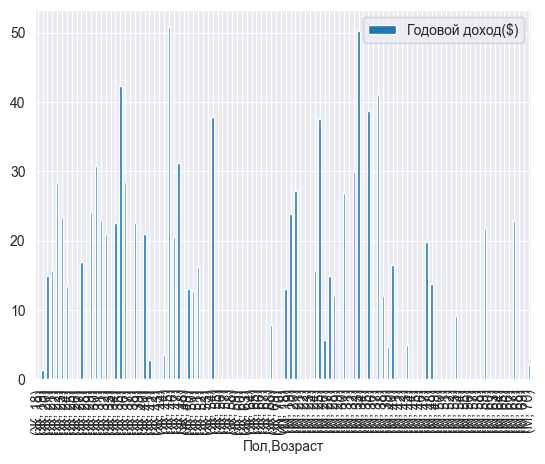

In [28]:
df[['Возраст','Годовой доход($)']].groupby('Возраст').std().plot(kind='bar')
df.corrwith(df['Годовой доход($)'])

df[['Пол','Годовой доход($)']].groupby('Пол').std().plot(kind='bar')

df[['Пол','Возраст','Годовой доход($)']].groupby(['Пол','Возраст']).std().plot(kind='bar')